##### Utfordring 3.1

In [2]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

# symboler jeg kan få bruk for:

C,c,l,L,a,b,u,u_0,w,z,s,q = sp.symbols('C c l L a b u u_0 w z s q')

In [3]:
# Stønad er lik 0

# definerer nyttefunksjonen:
def nytte(c,l):
    return c**0.5*l**0.5

# Setter inn i funksjonen der Tone ikke mottar stønad. Det vil si konsum er lik M og fritid er lik 60. 
print(f'Finner nyttenivå:')
display(nytte(100,60))

eq = sp.Eq((100+w*40)**0.5*(60-40)**0.5,77.45)

eq_sol = sp.solve(eq,w)

print('Finner reservasjonslønn:')
eq_sol

Finner nyttenivå:


77.45966692414834

Finner reservasjonslønn:


[4.99812812500000]

In [4]:
# Stønad er lik 100

# Legger til 100 i konsum som følge av tilgang til stønad. 
print(f'Finner nyttenivå:')
display(nytte(200,60))

# Setter nyttenivå inn i ligning og løser for w
eq2 = sp.Eq((100+w*40)**0.5*(60-40)**0.5,109.5)

eq2_sol = sp.solve(eq2,w)

print(f'Finner reservasjonslønn:')
eq2_sol

Finner nyttenivå:


109.54451150103323

Finner reservasjonslønn:


[12.4878125000000]

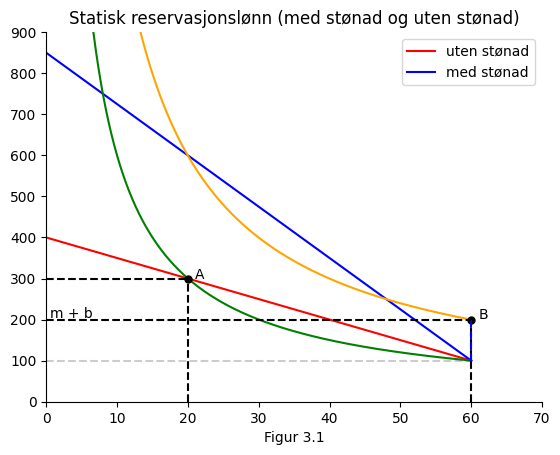

In [22]:
L_0 = np.linspace(0.001,60,1000)

fig , ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlim(0,70)
ax.set_ylim(0,900)

# Budsjett med støtte
budsjett = sp.Eq(100+5*(60-L),c)

def budsjett(L):
    return 400 - 5*L

# Budsjett uten støtte
budsjett2 = sp.Eq(100 + 12.5*(60-L),c)

def budsjett2(L):
    return 850 - 12.5*L

ax.plot(L_0,budsjett(L_0), label = 'uten stønad', color = 'red')
ax.plot(L_0,budsjett2(L_0), label = 'med stønad', color = 'blue')
ax.legend(loc = 'best')
ax.set_xlabel('Figur 3.1')

u = C**a*L**b

# Løser med hensyn på L 
L_ind_sol=sp.solve(u-u_0,L)[0]
L_ind_sol

# Må gjøre om for å plotte 
indiff_L=sp.lambdify((u_0,a,b,C), L_ind_sol)
indiff_L(u_0,a,b,C)
# Plotter
ax.plot(L_0, indiff_L(77.5,0.5,0.5,L_0), color = 'green')
ax.plot(L_0, indiff_L(109.5,0.5,0.5,L_0), color = 'orange')

# Plot notasjon 
ax.hlines(100,0,60, color='black',ls='dashed', alpha = 0.2)

ax.plot(60,200, marker  ='o', color= 'black', markersize = 5)
ax.vlines(60,0,200, color='black',ls='dashed')
ax.vlines(60,100,200, color='blue',ls='dashed')

ax.hlines(200,0,60, color='black',ls='dashed')
ax.annotate('B', (60+1,200+1))
ax.annotate('m + b', (0+0.5,200+5))

ax.vlines(20,0,300, color='black',ls='dashed')
ax.hlines(300,0,20, color='black',ls='dashed')
ax.annotate('A',(20+1,300))
ax.plot(20,300, marker  ='o', color= 'black', markersize = 5)

ax.set_title('Statisk reservasjonslønn (med stønad og uten stønad)');


Den statiske reservasjonlønnen når individet ikke kan bestemme arbeidstimer fritt, er gitt ved lønnen der individet er indifferent mellom å ikke arbeide og det å jobbe $ h_{ft}$. 

Gitt ved: $ U[m+w^r_{ft}h_{ft},l_0 - h_{ft}] = U(m,l_0).$ For å finne reservasjonslønnen har jeg først funnet nyttenivået, der $ l_0 = 60 $ og c = 100 og 200, og henholdvis satt inn i ordningen og løst for $ w^r $. Dette betyr at når $ w = w^r_{ft} $ så er valget til Tone i punktet der hun er indifferent mellom det å jobbe fulltid og det å ikke jobbe i det hele tatt. I punkt B jobber ikke Tone, hun har da et konsum som tilsvarer den arbeidsfri inntekten (m) pluss stønaden hun mottar ved å ikke arbeide (b). I punkt A mottar ikke Tone stønad (jobber 40 timer), vi observerer at punkt A er på et lavere nytte nivå $ A < B $. Tone har dermed mer nytte av å ikke arbeide, og vi ser at i denne figuren så vil preferansen til Tone være å ikke delta i arbeidsmarkedet. 

Tone sin reservasjonslønn øker fra 5 til 12.5 (i ti-ere). Årsaken til at reservasjonslønna øker er at alternativ kostnanden ved å ha fri reduseres. Tone har en lavere reservasjonslønn når hun ikke mottar stønad, da er kostnaden for å ha fri er relativt høy. Det vil si at dersom Tone ikke velger å jobbe går hun glipp av mye inntekt. Om Tone mottar stønad reduseres denne kostnanden, hun har større inntekt når hun ikke jobber (sammenlignet med da hun ikke mottar stønad). I figuren ser vi at helningen på budsjett betingelsen blir brattere, årsaken er at trygd øker verdien ved å ikke delta på arbeidsmarkedet. 

##### Utfordring 3.1.2

Trygd påvirker arbeidsmarkedet igjennom tre hoved kanaler. Når arbeidssøkere har en lav reservasjonslønn, finner de mange jobber attraktive, mens en høy reservasjonslønn begrenser antallet jobber som er attraktive. Denne effeketen kalles for jobbsøker effekten. Trygd bidrar også til å redusere alternativkostnadene ved å være arbeidsledig, noe som kan føre til en lavere søk-intensitet blant arbeidssøkere. Dette resulterer i en lengre varighet av arbeidsledighet, men når folk til slutt aksepterer en jobb, vil kvaliteten på denne jobben bedre, ettersom de har mulighet til å søke i en lengre periode.

På lønnssiden kan ufullkommen konkurranse føre til friksjoner, som skyldes at det tar tid for arbeidsgivere og arbeidstakere å finne hverandre, noe som gir begge parter en viss grad av markedsmakt. Arbeidsgiveren vet at arbeidstakeren ikke enkelt kan finne en annen jobb, mens arbeidstakeren vet at arbeidsgiveren vil ha vanskeligheter med å finne en annen kvalifisert arbeidstaker. Når trygden er høy, styrkes forhandlingsposisjonen til arbeidstakerne, noe som kan føre til høyere lønninger. Imidlertid kan høyere lønninger og en lav søk-intensitet gjøre det mindre verdifullt for bedrifter å ansette nye arbeidstakere.

Rettighetseffektene av trygd viser seg også på arbeidsmarkedet. Retten til trygd er ofte avhengig av tidligere sysselsetting og aktiv jobbsøking, noe som øker verdien av å delta på arbeidsmarkedet, bidrar til et økt arbeidstilbud, men ikke nødvendigvis fører til at flere faktisk arbeider. For "nye" arbeidssøkere, de uten rett til trygd, fører høyere trygdenivåer til en høyere verdi av å ha hatt jobb, noe som trekker flere til arbeidsmarkedet og øker deres søk-intensitet. For "gamle" arbeidssøkere, de med rett til trygd, fører derimot høyere trygdenivåer til en høyere alternativkostnad for å ta en jobb, noe som reduserer deres søk-intensitet. 

Trygd påvirker også markedet igjennom en høyere skattebyrde. Arbeidsledighetstrygd må finansierers, og jo mer generøs ytelsene er desto større skattbyrde.

Samlet sett har arbeidsledighetstrygd en sammensatt effekt på arbeidsmarkedet, med både positive og negative eksternaliteter, og det avhenger av balansen mellom ulike faktorer for å bestemme den samlede effekten på arbeidssøkere, lønninger og arbeidstilbud.

##### Utfordring 3.2

a)

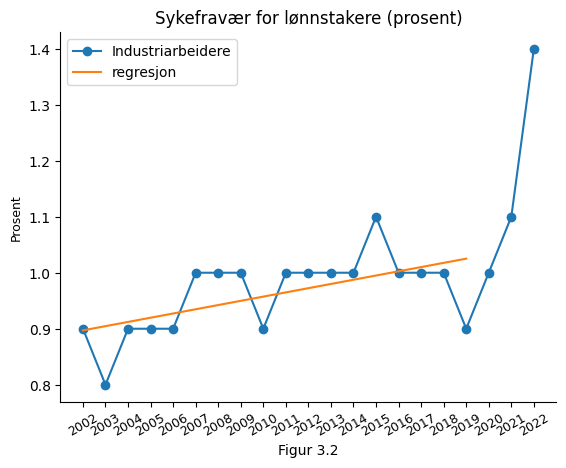

In [6]:
import requests
from pyjstat import pyjstat
from sklearn.linear_model import LinearRegression
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

postUrl = 'https://data.ssb.no/api/v0/no/table/12441/'

apiQuery = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "NACE2007",
      "selection": {
        "filter": "item",
        "values": [
          "10-33"
        ]
      }
    },
    {
      "code": "Sykefraver2",
      "selection": {
        "filter": "item",
        "values": [
          "E"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019",
          "2020",
          "2021",
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

egenmelding, df_id, ds = apiToDataframe(postUrl, apiQuery)

fig ,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_tick_params(labelsize=9, rotation = 30) 
ax.set_title('Sykefravær for lønnstakere (prosent)')
ax.set_ylabel('Prosent', size = 9)
ax.set_xlabel('Figur 3.2')
ax.plot(egenmelding['år'],egenmelding['value'], marker = 'o', label = 'Industriarbeidere')

egenmelding2 = egenmelding[egenmelding['år'] < '2020']

# lager regresjon 
egenmelding2['år'] = np.arange(len(egenmelding2.index))
X = egenmelding2.loc[:, ['år']] 
y = egenmelding2.loc[:, 'value']
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

ax.plot(egenmelding2['år'],y_pred, label = 'regresjon')
ax.legend(loc = 'best');

Figur 3.2 viser sykefravær i prosent fra 2002 til 2022 for industriarbeidere. Under koronaepidemien (2020 til 2022) ser vi at egenmeldingene øker betraktelig, derfor har jeg valgt å unnlate disse årene fra regresjonen. Regresjonslinjen viser at bruk av egenmelding har hatt en økenede trend siden "Tredagern" av Gatas Parlament som ble utgitt i 2002. 

b) 

I Norge har vi relativt generøse ytelser som finansieres av arbeidsgiver eller staten avhengig av lengden på sykefravær. Staten tilbyr sosial forsikring. Denne er ikke individ spesifikk, og tar ikke hensyn til individens risiko for å bli syk men er på aggregert nivå, derfor er den også suboptimal og det oppstår tap av velferd.

Egenmeldinger som det refereres til i "Tredagern" er et system der ansatte kan melde om sykefravær uten å måtte legge fram legeerklæring. Dette er ment til å redusere belastningen på helsevesenet og forenkle prossesen, men kan også ha en del disinsentiveffeker. Når bruk av egenmeldinger ikke innebærer et tap økonomisk (for arbeidstaker), kan det bidra til et høyere sykefravør. Egenmeldinger reduserer terskelen for å melde seg syk, slik at det blir enklere for ansatte å ha fridager fra jobb. Selv små helseproblemer som den ansatte ellers ville jobbet igjennom hvis den måtte vise frem legeerklæring, kan gi grunnlag for egenmelding. Dette medfører også en risiko for å at ansatte misbruker systemet, og tar ut egenmeldinger selv om de ikke er syke.

Bruk av egenmeldinger har også økonomiske effekter. Det fører til økte kostnander for arbeidsgiver, både på grunn av behovet for å leie inn andre, og fordi arbeidsgiver må betale kompensasjon for ansatte med egenmelding. Dette fører til lavere produktivetet på grunn av tap av arbeidstimer. 

I økonomisk teori fokuseres det ofte på tre forhold som forklarer konjukturbevegelsene i sykefraværet. Dersom arbeidsgiverene vet at sykepenger kan gi arbeidstakerene insentiver til å sykemelde seg, kan arbeidstakeren disiplineres av frykt for av arbeidsgiver oppfatter fraværet som negativt. Dette virker sterkest når arbeidsledigheten i økonomien er høy, ettersom arbeidsgiver enklere kan erstatte arbeidere. Dersom ledigheten er lav er det vanskeligere for arbedisgiver å finne nye ansatte. Ved Lav ledigheten vil også utsatte grupper finne seg arbeid enklere, noe som fører til at i høy konkjunktrer med lav ledigheten så vil fraværet være høyere. Teorien sier også at folkehelsen kan svinge med konjunkturene, som betyr at ved en høykonjunktur (periode med høy produktivtet) så blir arbeidere fortere utbrent, noe som fører til mer sykefravær. 

Ved å inkludere en sykdomsindeks i nyttefunksjonen kan vi lage en modell for sykefravær.

u = u(c,l,&sigma;).

Nær &sigma; nærmer seg 1 verdsetter individet fritid høyt. Det motsatte gjelder når &sigma; nærmer seg null. Når individet opplever et lavere sykdomsnivå, tillegger den relativt større vekt til konsum i forhold til fritid. 

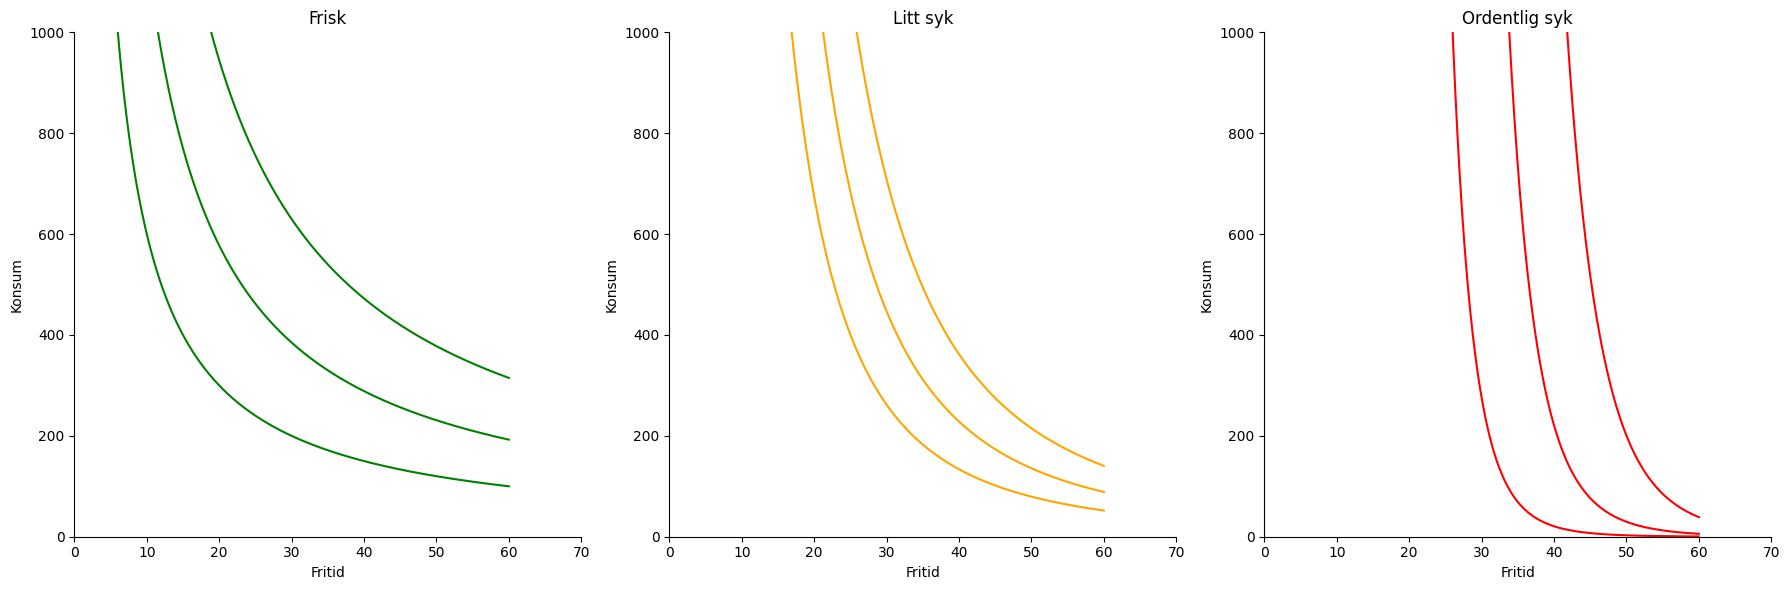

In [18]:
# Nyttefunksjon (CB funksjon)
def I_1(l_1):
    return ((77.45) / (l_1**0.5))**(1/0.5)

def I_2(l_1):
    return (((107.45) / (l_1**0.5))**(1/0.5))

def I_3(l_1):
    return (((137.45) / (l_1**0.5))**(1/0.5))

def I_4(l_1):
    return ((77.45) / (l_1**0.7))**(1/0.3)

def I_5(l_1):
    return ((67.45) / (l_1**0.7))**(1/0.3)

def I_6(l_1):
    return ((57.45) / (l_1**0.7))**(1/0.3)

def I_7(l_1):
    return ((37.45) / (l_1**0.9))**(1/0.1)

def I_8(l_1):
    return ((47.45) / (l_1**0.9))**(1/0.1)

def I_9(l_1):
    return ((57.45) / (l_1**0.9))**(1/0.1)

l_1 = np.linspace(0.01, 60, 1000)  

# Lager graf 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 rad med 3 kolonner 

# Plot for frisk
axes[0].plot(l_1, I_1(l_1), color="green")
axes[0].plot(l_1, I_2(l_1), color="green")
axes[0].plot(l_1, I_3(l_1), color="green")
axes[0].set_title("Frisk")
axes[0].set_xlim(0, 70)
axes[0].set_ylim(0, 1000)
axes[0].set_xlabel("Fritid")
axes[0].set_ylabel("Konsum")
axes[0].spines['top'].set_color('none')
axes[0].spines['right'].set_color('none')

# Plot for litt syk 
axes[1].plot(l_1, I_4(l_1), color="orange")
axes[1].plot(l_1, I_5(l_1), color="orange")
axes[1].plot(l_1, I_6(l_1), color="orange")
axes[1].set_title("Litt syk")
axes[1].set_xlim(0, 70)
axes[1].set_ylim(0, 1000)
axes[1].set_xlabel("Fritid")
axes[1].set_ylabel("Konsum")
axes[1].spines['top'].set_color('none')
axes[1].spines['right'].set_color('none')

# Plot for ordentlig syk 
axes[2].plot(l_1, I_7(l_1), color="red")
axes[2].plot(l_1, I_8(l_1), color="red")
axes[2].plot(l_1, I_9(l_1), color="red")
axes[2].set_title("Ordentlig syk")
axes[2].set_xlim(0, 70)
axes[2].set_ylim(0, 1000)
axes[2].set_xlabel("Fritid")
axes[2].set_ylabel("Konsum")
axes[2].spines['top'].set_color('none')
axes[2].spines['right'].set_color('none')

plt.tight_layout()
plt.show()


Figuren over illusterer hvordan et individ tillegger ulik vekt til fritid og konsum i henhold til hvor syk han/hun er. Dersom individet er ordentlig syk tillegger han/hun mye vekt til fritid og restitusjon. Kurven er bratt og individet verdsetter fritid eller restitusjon relativt høyt, det vil si at individet er villig til å gi slipp på mye konsum for å få en ekstra enhet med fritid. Dersom individet er litt syk er forholdet (MSB) mindre, som betyr at individet ikke trenger å gi slipp på like mye konsum for å få en ekstra enhet fritid. I figuren der indivdet er frisk er forholdet likt. Det vil si at individet må gi slipp på en enhet med det ene godet for å få en ekstra enhet av det andre. I denne situasjonen har individet like sterke preferanser for konsum og fritid, og bytter konsum og fritid på en en-til-en basis langs indifferansekurven. 

Samlet sett reduserer egenmeldinger terskelen for å medle seg syk. Alternativkostnaden ved fritid reduseres. Dette fører til en substitusjonseffekt der fritid blir mer attraktivt enn arbeid, individet vil ønske seg mer fritid, som reduserer arbeidstimene.  

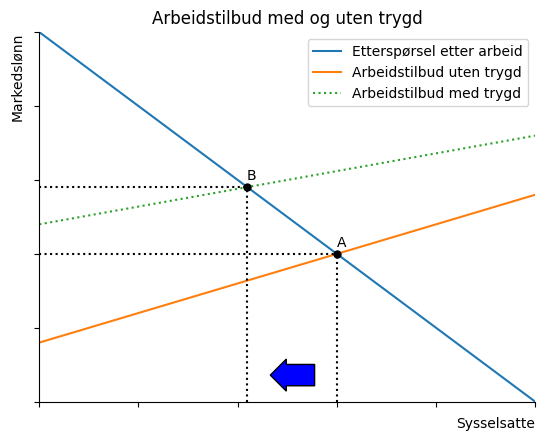

In [27]:
fig, ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlim(0,50)
ax.set_ylim(0,250)

def etterspørsel(x):
    return 250 - 5*x

def tilbud(x):
    return 40 + 2*x

def tilbud2(x):
    return 120 + 1.2*x

x = np.linspace(0.001,50,1000)

ax.plot(x,etterspørsel(x), label = 'Etterspørsel etter arbeid')
ax.plot(x,tilbud(x), label = 'Arbeidstilbud uten trygd')
ax.plot(x,tilbud2(x), linestyle = 'dotted', label = 'Arbeidstilbud med trygd')
ax.legend(loc = 'best')
ax.set_title('Arbeidstilbud med og uten trygd')
ax.set_xlabel('Sysselsatte', loc = 'right')
ax.set_ylabel('Markedslønn', loc = 'top')

# løser likevekt for hånd

ax.vlines(30,0,100, color = 'black', ls = 'dotted')
ax.vlines(20.9,0,145, color = 'black', ls = 'dotted')
ax.hlines(145,0,20.9, color = 'black', ls = 'dotted')
ax.hlines(100,0,30, color = 'black', ls = 'dotted')

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.annotate('A',(30,100+5))
ax.plot(30,100, marker  ='o', color= 'black', markersize = 5)

ax.annotate('B',(20.9,145+5))
ax.plot(20.9,145, marker  ='o', color= 'black', markersize = 5)

t = ax.text(26, 18, "      ",
            ha="center", va="center", rotation=540, size=12,
            bbox=dict(boxstyle="rarrow,pad=0.1",
                      fc="blue"));


I et marked med perfekt konkurranse er det ikke arbeidsledighet, og dermed er arbeidsledighetstrygd og sykepenger urelevant. Men et marked med perfekt konkurranse kan likevel gi intuisjon når man studerer effektene dette har på økonomien. 

Som diskturert i utfordring 3.1 øker den statiske reservasjonslønna som følge av tilgangen til stønad. Om arbeid er et normalt gode så vil reservasjonslønnen øke med graden av stønad. I et marked med perfekt konkurranse har dette flere virkninger. Arbeidstilbudet øker med lønnen, det vil si at jo høyere lønnen er desto flere arbeidere tilbyr arbeidskraft. Dersom vi innfører en arbeidstrygd øker reservasjonslønnen, arbeidstilbudet skifter oppover. Effektene er sterkere for arbeidere med lav reservasjonslønn, og derfor ser vi at avstanden mellom tilbudskurvene reduseres med markedslønna. Dette betyr at arbeidsledighetstrygd øker likevektslønnen og reduserer sysselsettingen. Ordninger som sykepenger og arbeidsledighetstrygd kan derfor kristiseres for å ha disinsenetiv effekter, som skyver personer ut av arbeidsmarkedet. I figuren observerer vi disse effektene ved tilpasningen fra A til B.

c) 

For å motvirke disinsentiveffektene har mange land innført mottiltak. Dette inkluderer tidsbegrensede ytelser, aktive arbeidsmarkedstiltak (ALMP), ytelser for å redusere trygden over tid, og inntektstesting for å justere størrelsen på ytelsene basert på andre inntekter.

En lavere kompensasjonsgrad vil gi arbeidstaker et økonomisk insentiv til å jobbe. Og illusteres i grafen under. Her ser vi at dersom graden av kompensasjon eller sykepenger ikke lengre kompenseres 100%, vil individet velge å jobbe mer. Da øker alternativ kostanden ved å ikke arbeide, som fungerer som et insentiv for individet til å arbeide fortsette i arbeid. Målet er å balansere behovet for stønad med å gi arbeiderne arbeidsinsentiver. Ved å gjøre dette, kan samfunnet bidra til å redusere arbeidsledigheten, øke arbeidstilbudet, og samtidig opprettholde et støttenettverk for de som trenger det.

<img src="Kompensasjonsgrad.png" width="500"/>

#####  Kildeliste

Boeri, T. & van Ours, J. The Economics of Imperfect Labor Markets, Third Edition, Princeton.

Videoforelesning, Andrea Mannberg (2022). SOK 2008: Arbeidsledighetsrate. 
Link: https://www.youtube.com/watch?v=PIK38cpDgOY&ab_channel=AndreaMannberg

Forelesningsnotater, Mikko Moilanen (2023). SOK 2008: Disinsentiveffekter. Link: https://uit-sok-2008-h23.github.io/assets/kap_6_insentiv_studenter.html

Forelesningsnotater, Andrea Mannberg (2023). SOK 2008: Arbeidsledighetstrygd. Link: https://uit-sok-2008-h23.github.io/assets/F4.3_Arbeidsledighetstrygd_2023.pdf